# Multi-modal deep learning on basketball data


### Explore Datasets

We will use a dataset of scores from US College Basketball tournament games. Dataset has the the seed difference that represents the ranking of how strong the teams are and the score difference of the game (e.g. if team_1 wins by 5 points, the score difference is 5).


In [1]:
import pandas as pd
games_tourney = pd.read_csv("dataset/games_tourney.csv")
print(games_tourney.shape)
games_tourney.head()

(4234, 9)


,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [2]:
games_season = pd.read_csv("dataset/games_season.csv")
print(games_season.shape)
games_season.head()

(312178, 8)


,season,team_1,team_2,home,score_diff,score_1,score_2,won
0,1985,3745,6664,0,17,81,64,1
1,1985,126,7493,1,7,77,70,1
2,1985,288,3593,1,7,63,56,1
3,1985,1846,9881,1,16,70,54,1
4,1985,2675,10298,1,12,86,74,1


Among these two datasets, `games_season` dataset has the most number of data. We can use this dataset to train a deep learning model and then use that model to see how the model performs in `games_tourney` being the test dataset

### Creating a very simple model


There is an issue with one dataset and that is `seed_diff` feature is not available in `games_season` whereas it is available in `games_tourney`. This is an important feature that represents team strength. In order to get this feature available for `games_season`, we can create a simple regression model using deep learning. This model will be trained with `games_tourney` dataset and then used to produce the missing feature in `games_season` dataset.

In [3]:
# Load layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

# Build the model
model = Model(input_tensor, output_tensor)

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')


Let us create a helper function to visualize the model structure and then use it to see the layers in the deep learning model

In [4]:
# Import the plotting function
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

def model_summary(model, model_name):
    # Summarize the model
    model.summary()

    # Plot the model
    plot_model(model, to_file=model_name)

    # Display the image
    data = plt.imread(model_name)
    plt.imshow(data)
    plt.show()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


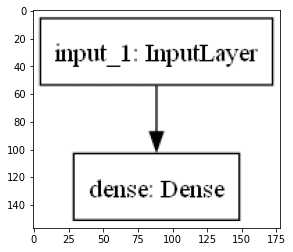

In [5]:
model_summary(model=model, model_name="seed_diff_model.png")



Let us train the model and also evaluate the performance

In [6]:
# Now fit the model
y = games_tourney['seed_diff']
X = games_tourney['score_diff']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.2, shuffle=True)
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1)

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test))



Epoch 1/25
24/24 [==============================] - 0s 6ms/step - loss: 11.9070 - val_loss: 11.0995
Epoch 2/25
24/24 [==============================] - 0s 1ms/step - loss: 11.6540 - val_loss: 10.8716
Epoch 3/25
24/24 [==============================] - 0s 1ms/step - loss: 11.4009 - val_loss: 10.6444
Epoch 4/25
24/24 [==============================] - 0s 2ms/step - loss: 11.1505 - val_loss: 10.4159
Epoch 5/25
24/24 [==============================] - 0s 1ms/step - loss: 10.8991 - val_loss: 10.1942
Epoch 6/25
24/24 [==============================] - 0s 1ms/step - loss: 10.6553 - val_loss: 9.9762
Epoch 7/25
24/24 [==============================] - 0s 1ms/step - loss: 10.4120 - val_loss: 9.7606
Epoch 8/25
24/24 [==============================] - 0s 1ms/step - loss: 10.1714 - val_loss: 9.5500
Epoch 9/25
24/24 [==============================] - 0s 1ms/step - loss: 9.9333 - val_loss: 9.3446
Epoch 10/25
24/24 [==============================] - 0s 2ms/step - loss: 9.7006 - val_loss: 9.1381
Epoch 

Now we will create the desired `seed_diff` feature for the `games_season` dataset.

In [7]:
games_season["seed_diff"] = model.predict(games_season['score_diff'])
games_season.head()

,season,team_1,team_2,home,score_diff,score_1,score_2,won,seed_diff
0,1985,3745,6664,0,17,81,64,1,-0.699280
1,1985,126,7493,1,7,77,70,1,-0.273044
2,1985,288,3593,1,7,63,56,1,-0.273044
3,1985,1846,9881,1,16,70,54,1,-0.656656
4,1985,2675,10298,1,12,86,74,1,-0.486162
